In [1]:
# import the necessary packages
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score #model evaluation

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics

pd.set_option('display.max_rows', 400)

%matplotlib inline

1. (5 pts) Using the heavy lifting data set from `"https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-10-08/ipf_lifts.csv"`, build an sklearn regression model that predicts the body weight (in kg) of a compteitor. Don't standardize your variables.
    * interpret the coefficients from your model
    * describe how accurate your model is, and which metrics you used to decide that.
    * plot the residuals vs *predicted* body weight. Is the error homoskedastic? If it wasn't what issues could that cause?

</br>
</br>

2. (2 pts) Build the same model as above, but z-score (`StandardScaler()`) your variables.
    * how does the interpretation of the coefficients change?


</br>
</br>


3. (3 pts) Choose one of the continuous predictor variables you chose. Plot body weight by that variable using plotnine/ggplot. Is the relationship roughly linear? What do you think the consequences could be if it wasn't/isn't?

In [2]:
#1

hl = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-10-08/ipf_lifts.csv")

hl.dropna(inplace=True)
hl.head()

,name,sex,event,equipment,age,age_class,division,bodyweight_kg,weight_class_kg,best3squat_kg,best3bench_kg,best3deadlift_kg,place,date,federation,meet_name
208,Anna-Liisa Prinkkala,F,SBD,Single-ply,33.5,24-34,Open,44.0,44,135.0,60.0,145.0,1,1989-11-13,IPF,World Powerlifting Championships
209,Vuokko Viitasaari,F,SBD,Single-ply,34.5,24-34,Open,44.0,44,120.0,62.5,145.0,2,1989-11-13,IPF,World Powerlifting Championships
210,Maria DelCastillo,F,SBD,Single-ply,23.5,24-34,Open,44.0,44,130.0,62.5,120.0,3,1989-11-13,IPF,World Powerlifting Championships
211,Helen Wolsey,F,SBD,Single-ply,27.5,24-34,Open,44.0,44,112.5,60.0,135.0,4,1989-11-13,IPF,World Powerlifting Championships
212,Lijnie van der Holst,F,SBD,Single-ply,37.5,35-39,Open,44.0,44,105.0,65.0,130.0,5,1989-11-13,IPF,World Powerlifting Championships


In [3]:
wcTrim = []
type(len(hl.index))
for g in hl['weight_class_kg']:
    x = 0 if "+" in g else float(g)
    #print(type(x))
    wcTrim.append(x)

hl["WC_Float"] = wcTrim

noPlus = hl["WC_Float"] != 0

hlNoPlus = hl.loc[noPlus]
print(hlNoPlus.dtypes)
hlNoPlus.head()

name                 object
sex                  object
event                object
equipment            object
age                 float64
age_class            object
division             object
bodyweight_kg       float64
weight_class_kg      object
best3squat_kg       float64
best3bench_kg       float64
best3deadlift_kg    float64
place                object
date                 object
federation           object
meet_name            object
WC_Float            float64
dtype: object


,name,sex,event,equipment,age,age_class,division,bodyweight_kg,weight_class_kg,best3squat_kg,best3bench_kg,best3deadlift_kg,place,date,federation,meet_name,WC_Float
208,Anna-Liisa Prinkkala,F,SBD,Single-ply,33.5,24-34,Open,44.0,44,135.0,60.0,145.0,1,1989-11-13,IPF,World Powerlifting Championships,44.0
209,Vuokko Viitasaari,F,SBD,Single-ply,34.5,24-34,Open,44.0,44,120.0,62.5,145.0,2,1989-11-13,IPF,World Powerlifting Championships,44.0
210,Maria DelCastillo,F,SBD,Single-ply,23.5,24-34,Open,44.0,44,130.0,62.5,120.0,3,1989-11-13,IPF,World Powerlifting Championships,44.0
211,Helen Wolsey,F,SBD,Single-ply,27.5,24-34,Open,44.0,44,112.5,60.0,135.0,4,1989-11-13,IPF,World Powerlifting Championships,44.0
212,Lijnie van der Holst,F,SBD,Single-ply,37.5,35-39,Open,44.0,44,105.0,65.0,130.0,5,1989-11-13,IPF,World Powerlifting Championships,44.0


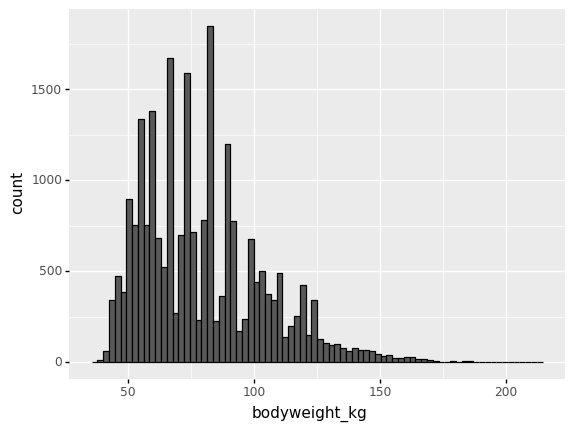

<ggplot: (187065778899)>

In [4]:
(ggplot(hl, aes("bodyweight_kg")) + geom_histogram(color = "black"))

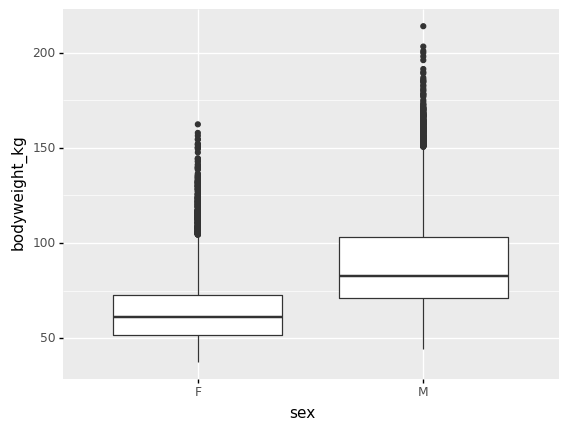

<ggplot: (187068095735)>

In [5]:
(ggplot(hl, aes(x = "sex", y = "bodyweight_kg")) + geom_boxplot())

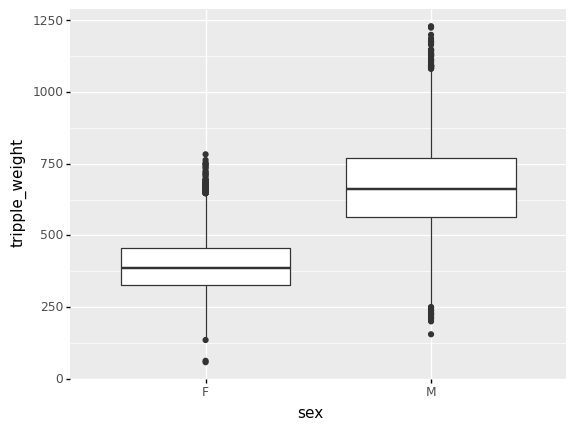

<ggplot: (187068140584)>

In [6]:
trippleWeight = hl["best3squat_kg"] + hl["best3bench_kg"] + hl["best3deadlift_kg"]

hl['tripple_weight'] = trippleWeight

(ggplot(hl, aes(x = "sex", y = "tripple_weight")) + geom_boxplot())

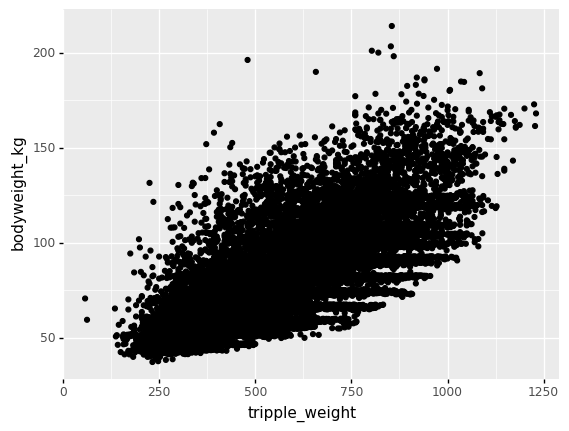

<ggplot: (187068171746)>

In [7]:
(ggplot(hl, aes(x = "tripple_weight", y = "bodyweight_kg")) + 
 geom_point())

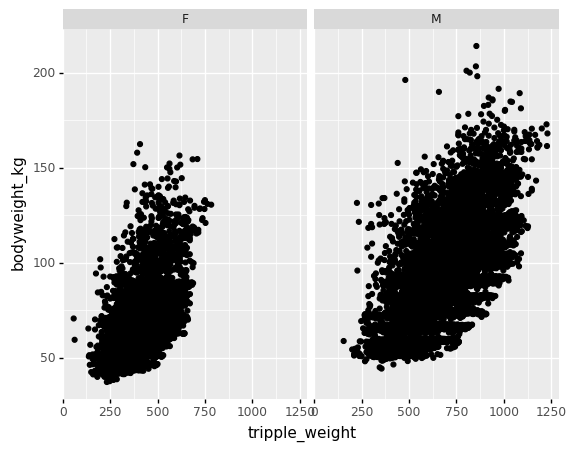

<ggplot: (187046624010)>

In [8]:
(ggplot(hl, aes(x = "tripple_weight", y = "bodyweight_kg")) + 
 geom_point() +
 facet_wrap('sex'))

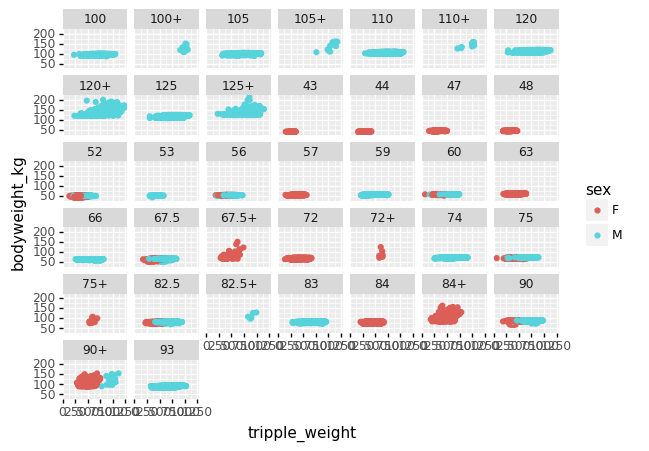

<ggplot: (187068399981)>

In [9]:
(ggplot(hl, aes(x = "tripple_weight", y = "bodyweight_kg", color = "sex")) + 
 geom_point() +
 facet_wrap('weight_class_kg'))

In [10]:
sex01 = []
type(len(hl.index))
for g in hl['sex']:
    x = 1 if g == "M" else 0
    sex01.append(x)

hl["sex01"] = sex01

In [11]:
predictors = ["age","best3squat_kg","best3bench_kg","best3deadlift_kg"]

X = hl[predictors]
y = hl["bodyweight_kg"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

x_train.head()

(19052, 4)
(4763, 4)
(19052,)
(4763,)


,age,best3squat_kg,best3bench_kg,best3deadlift_kg
32169,22.5,140.0,60.0,160.0
17555,15.5,175.0,107.5,160.0
384,30.5,360.0,205.0,350.0
2037,28.5,315.0,220.0,312.5
40297,28.5,227.5,142.5,225.0


In [12]:
model = LinearRegression()
model.fit(x_train, y_train)

LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
y_pred = model.predict(x_test)

model.score(x_test, y_test)

In [ ]:
model.score(x_train, y_train)

In [ ]:
r2_score(y_test, y_pred)

In [ ]:
true_vs_pred = pd.DataFrame({"predict": y_pred, "trueV": y_test})
true_vs_pred

In [ ]:
(ggplot(true_vs_pred, aes(x = "trueV", y = "predict")) + 
 geom_point() +
 geom_line(aes(x = "trueV", y = "trueV"), color="blue") +
 labs(x = "True Weight (kg)", y = "Predicted Weight (kg)") +
 theme_minimal())

In [ ]:
coefficients = pd.DataFrame({"Coef":model.coef_, "Name": predictors})
coefficients = coefficients.append({"Coef": model.intercept_, "Name": "intercept"}, ignore_index = True)

coefficients.head()

* interpret the coefficients from your model
    * All three coefficients show that there is a predicted increase in weight with each extra kilogram that is able to be lifted. Specifically, for each extra kilogram a person can squat, the model predicts a 0.083 kg increase in weight, for each extra kilogram a person can bench press, the model predicts a 0.162 kg increase in weight, and for each extra kilogram a person can deadlift, the model predicts a 0.046 kg increase in weight. Additionally, the model says if someone is unable to lift anything, their weight would be a pathetic 30 kg (only about 66 lbs).
* describe how accurate your model is, and which metrics you used to decide that.
    * The model is fairly inaccurate according to the r squared value. The model only accounts for arount 53% of the variation.
* plot the residuals vs body weight. Is the error homoskedastic? If it wasn't what issues could that cause?

In [ ]:
true_vs_pred["Residuals"] = true_vs_pred["trueV"] - true_vs_pred["predict"]

(ggplot(true_vs_pred, aes(x = "trueV", y = "Residuals")) + 
 geom_point() +
 labs(x = "True Weight (kg)", y = "Residuals") +
 theme_minimal())


* The error is heteroscedastic, instead it increases as the true value for weight increases. This is most likely caused by the nature of the data; meaning human beings can only lift so much regardless of their weight and in the heavier weight classes being heavier doesn't necessarily mean lifitng heavier.

In [ ]:
#2

predictors = ["age","best3squat_kg","best3bench_kg","best3deadlift_kg"]

X = hl[predictors]
y = hl["bodyweight_kg"]

zScore = StandardScaler()
zScore.fit(X)
xz = zScore.transform(X)
xz
xzdf = pd.DataFrame({"z_age": xz[:,0], "z_squat": xz[:,1], "z_bench": xz[:,2], "z_deadlift": xz[:,3]})
xzdf.head()

## Age (Original, ZScored)

In [ ]:
(ggplot(hl, aes("age")) + geom_histogram())

In [ ]:
(ggplot(xzdf, aes("z_age")) + geom_histogram())

## Best 3 Squat Distribution (Original, ZScored)

In [ ]:
(ggplot(hl, aes("best3squat_kg")) + geom_histogram())

In [ ]:
(ggplot(xzdf, aes("z_squat")) + geom_histogram())

## Best 3 Bench Press Distribution (Original, ZScored)

In [ ]:
(ggplot(hl, aes("best3bench_kg")) + geom_histogram())

In [ ]:
(ggplot(xzdf, aes("z_bench")) + geom_histogram())

## Best 3 Deadlift Distribution (Original, ZScored)

In [ ]:
(ggplot(hl, aes("best3deadlift_kg")) + geom_histogram())

In [ ]:
(ggplot(xzdf, aes("z_deadlift")) + geom_histogram())

In [ ]:
zModel = LinearRegression()
zModel.fit(xz, y)

In [ ]:
weight_pred = zModel.predict(xz)

mean_squared_error(y, weight_pred)

In [ ]:
r2_score(y, weight_pred)

In [ ]:
true_vs_predZ = pd.DataFrame({"predict": weight_pred, "trueV": y})
true_vs_predZ

In [ ]:
(ggplot(true_vs_pred, aes(x = "trueV", y = "predict")) + 
 geom_point() +
 geom_line(aes(x = "trueV", y = "trueV"), color="blue") +
 labs(x = "True Weight (kg)", y = "Predicted Weight (kg)") +
 theme_minimal())

In [ ]:
true_vs_predZ["Residuals"] = true_vs_predZ["trueV"] - true_vs_predZ["predict"]

(ggplot(true_vs_predZ, aes(x = "trueV", y = "Residuals")) + 
 geom_point() +
 labs(x = "True Weight (kg)", y = "Residuals") +
 theme_minimal())

In [ ]:
coefficientsZ = pd.DataFrame({"Coef":zModel.coef_, "Name": predictors})
coefficientsZ = coefficientsZ.append({"Coef": zModel.intercept_, "Name": "intercept"}, ignore_index = True)

coefficientsZ.head()

* how does the interpretation of the coefficients change?
    * After z-scoring the predictors, the coefficients show that for each increase by one standard deviation of a predictor, the predicted bodyweight would increase by the coefficient. So, an increase in squat weight by one standard deviation would correspond to an increase in about 8.7 kilograms of body weight. Additionally, the intercept now is the predicted average bodyweight which corresponds to every type of lift having a z-score of zero.

In [ ]:
#3

(ggplot(hl, aes(x = "best3bench_kg", y = "bodyweight_kg")) + 
 geom_point())

* The relationsip between the best3bench_kg and bodyweight_kg is roughly linear (at least for the data present), however it has a fairly low correlation, especially as bodyweight and bench press weight increase. If the relationship weren't linear, I think it would negatively effect the ability predict the weight of a lifter as their best bench press in kilograms increases beyond the values present. However, the liklihood that someone would be able to bench press more than the 410 kilograms shown is very low so the inability to predict is not an issue.